## Install necessary packages

In [ ]:
! pip install -U transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 71.8 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.2
    Uninstalling transformers-4.41.2:
      Successfully uninstalled transformers-4.41.2


In [ ]:
pip install huggingface


In [ ]:
! pip install -U accelerate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 6.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
!pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 

## Extract dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

def unzip_folder(zip_file_path, extract_to):
    # Ensure the extraction directory exists
    if not os.path.exists(extract_to):
        os.makedirs(extract_to)

    # Unzip the folder
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

    # List all files in the extracted directory
    extracted_files = []
    for root, dirs, files in os.walk(extract_to):
        for file in files:
            extracted_files.append(os.path.join(root, file))

    return extracted_files

# Specify the path to the zip file and the extraction directory
zip_file_path = '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented).zip'
extract_to = '/content/data'

# Unzip and store the contents in a variable
extracted_files = unzip_folder(zip_file_path, extract_to)




## Exploring Class Distribution

In [ ]:
import os

# Define the dataset directory
data_dir = '/content/data/New Plant Diseases Dataset(Augmented)/train'

# List all subdirectories (each representing a class)
classes = os.listdir(data_dir)

# Count the number of classes
num_classes = len(classes)

print(f"Total number of classes: {num_classes}")


Total number of classes: 44


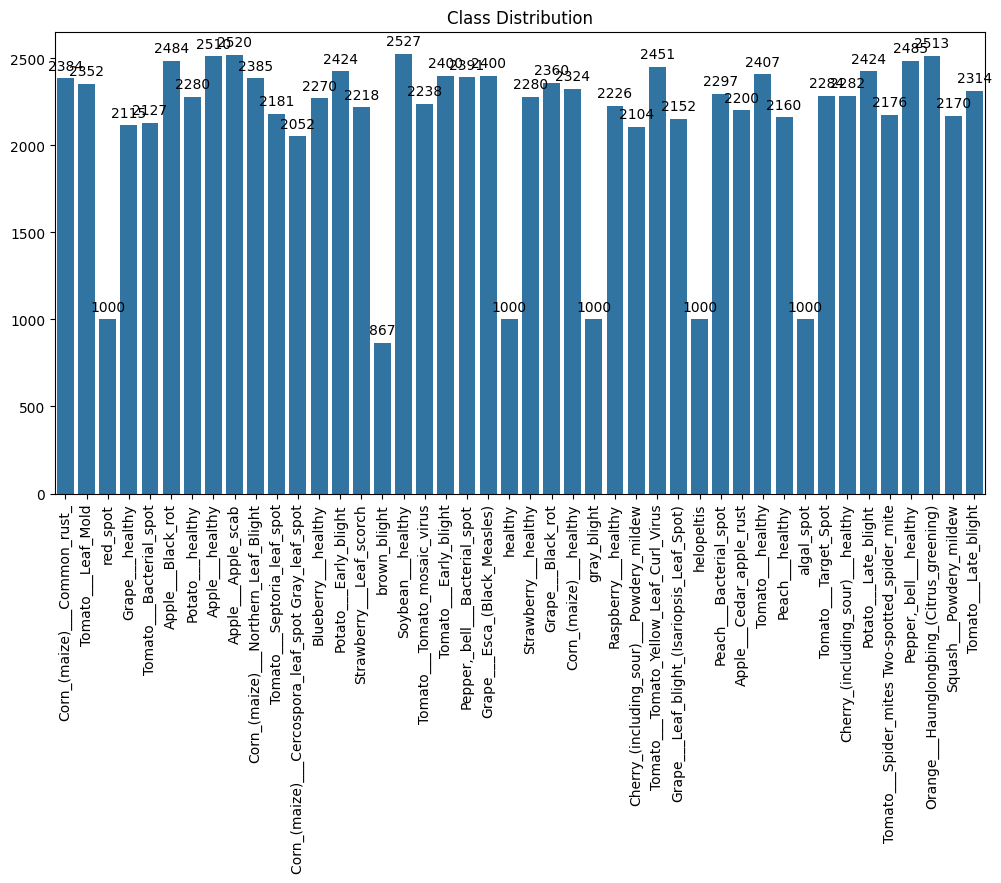

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Define the dataset directory
data_dir = '/content/data/New Plant Diseases Dataset(Augmented)/train'

# Function to load images lazily from a folder
def load_images_from_folder(folder):
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = Image.open(img_path)
            yield img
        except:
            print(f"Failed to load image {img_path}")

# Check class distribution without loading images
class_counts = {class_name: len(os.listdir(os.path.join(data_dir, class_name))) for class_name in os.listdir(data_dir)}
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xticks(rotation=90)
plt.title('Class Distribution')

# Annotate bars with counts
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.show()




## Exploring and Visualizing

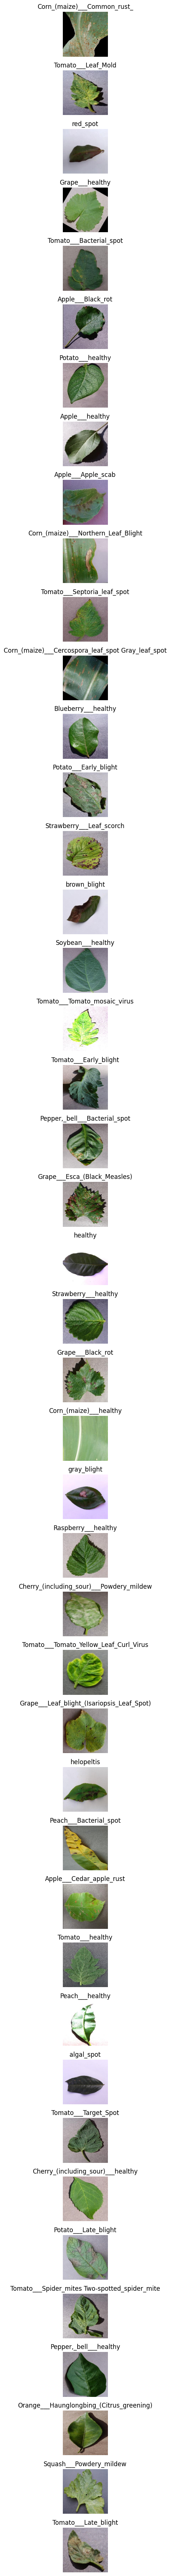

In [ ]:
# Display sample images without loading all at once
def display_sample_images(data_dir, samples_per_class=1):
    plt.figure(figsize=(75, 70))
    class_names = os.listdir(data_dir)
    for idx, class_name in enumerate(class_names):
        img_folder = os.path.join(data_dir, class_name)
        sample_images = list(load_images_from_folder(img_folder))[:samples_per_class]
        for sample_idx, img in enumerate(sample_images):
            plt.subplot(len(class_names), samples_per_class, idx * samples_per_class + sample_idx + 1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')
    plt.tight_layout()
    plt.show()

display_sample_images(data_dir)

## Analyzing Image Dimensions

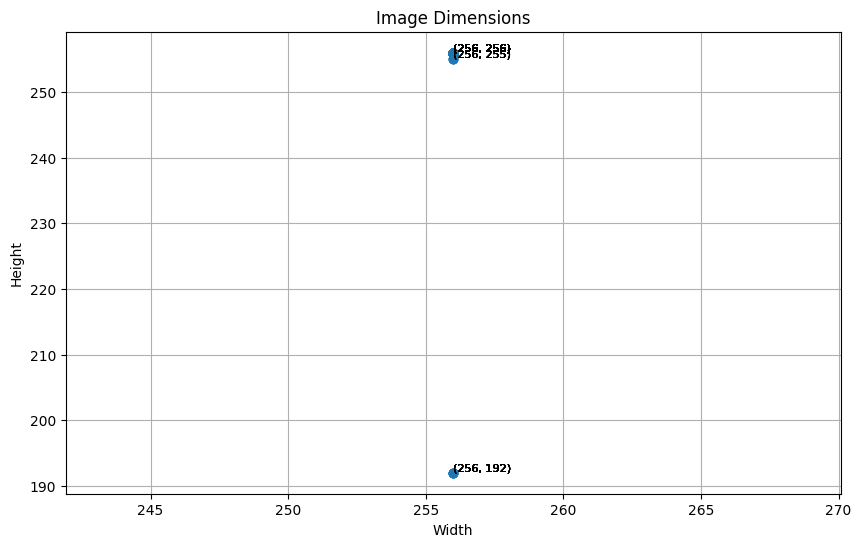

In [ ]:
def plot_image_dimensions(data_dir):
    dimensions = []
    for class_name in os.listdir(data_dir):
        img_folder = os.path.join(data_dir, class_name)
        for filename in os.listdir(img_folder):
            img_path = os.path.join(img_folder, filename)
            try:
                img = Image.open(img_path)
                width, height = img.size
                dimensions.append((width, height))
            except:
                print(f"Failed to load image {img_path}")

    dimensions = np.array(dimensions)
    plt.figure(figsize=(10, 6))
    plt.scatter(dimensions[:, 0], dimensions[:, 1], alpha=0.5)
    plt.title('Image Dimensions')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.grid(True)

    # Annotate each point with its dimensions
    for (width, height) in dimensions:
        plt.text(width, height, f'({width}, {height})', fontsize=8, ha='left', va='bottom')

    plt.show()

plot_image_dimensions(data_dir)


# Model checkpoint

In this section, we initialize the model and set the parameters for training. We use the "microsoft/swinv2-tiny-patch4-window8-256" SWIN Transformer model checkpoint from the Hugging Face model hub. The batch size for training is set to 64. We then import necessary modules from the Hugging Face Hub and log in using a personal access token to access the model and other resources.

In [ ]:
model_checkpoint = "microsoft/swinv2-tiny-patch4-window8-256"
batch_size = 64

In [ ]:
# Import necessary modules
from huggingface_hub import login

# Set your personal access token
login(token="PUT YOUR HUGGING FACE TOKEN")


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


# Loading complete data

In this section, we load the dataset and initialize the accuracy metric for evaluation. We use the load_dataset function from the datasets library to load the image dataset from the specified directory. We also import the load_metric function to set up the accuracy metric for evaluating our model's performance. Additionally, we create mappings between label names and their corresponding IDs (label2id) and vice versa (id2label) to facilitate the handling of labels during training and evaluation.

In [ ]:
from datasets import load_dataset
dataset = load_dataset("imagefolder", data_dir="/content/data/New Plant Diseases Dataset(Augmented)/train")

Resolving data files:   0%|          | 0/93734 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 93734
    })
})

In [ ]:
from datasets import load_metric

metric = load_metric("accuracy")


<ipython-input-12-350fcae91df9>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


The repository for accuracy contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/accuracy.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [ ]:
labels = dataset["train"].features["label"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label

# Data preprocessing

In this section, we set up the data preprocessing pipeline using the Hugging Face transformers library and the torchvision library for data augmentation. We start by initializing the image processor from the pretrained model checkpoint. We define normalization parameters based on the processor's configuration and determine the target size for resizing images.

For the training dataset, we apply a series of transformations including random resized cropping, horizontal flipping, color jitter, and normalization. For validation and test datasets, we apply resizing and normalization to maintain consistency.

We then define functions to preprocess batches of training and validation images by applying the respective transformations. Finally, we split the dataset into training, validation, and test sets, ensuring an 80-10-10 split. Each subset is then transformed using the defined preprocessing functions to prepare the data for model training and evaluation.

In [ ]:
from transformers import AutoImageProcessor

image_processor  = AutoImageProcessor.from_pretrained(model_checkpoint)
image_processor

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/240 [00:00<?, ?B/s]

ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 256,
    "width": 256
  }
}

In [ ]:
from torchvision.transforms import Compose, Normalize, Resize, ToTensor, RandomHorizontalFlip, ColorJitter

normalize = Normalize(mean=image_processor.image_mean, std=image_processor.image_std)

if "height" in image_processor.size:
    size = (image_processor.size["height"], image_processor.size["width"])
elif "shortest_edge" in image_processor.size:
    size = (image_processor.size["shortest_edge"], image_processor.size["shortest_edge"])

# Define additional transforms for data augmentation
train_transforms = Compose([
    Resize(size),  # Ensure all images are the same size
    RandomHorizontalFlip(),  # Random horizontal flip
    ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Random color jitter
    ToTensor(),
    normalize,
])

# Validation transforms remain the same
val_transforms = Compose([
    Resize(size),
    ToTensor(),
    normalize,
])

def preprocess_train(example_batch):
    example_batch["pixel_values"] = [
        train_transforms(image.convert("RGB")) for image in example_batch["image"]
    ]
    return example_batch

def preprocess_val(example_batch):
    example_batch["pixel_values"] = [
        val_transforms(image.convert("RGB")) for image in example_batch["image"]
    ]
    return example_batch

In [ ]:
# First, split the dataset into 80% training and 20% temp (which will later be split into test and val)
splits_1 = dataset["train"].train_test_split(test_size=0.2)
train_ds = splits_1['train']
temp_ds = splits_1['test']

# Now, split the temp_ds (20% of original) into test (50% of 20% -> 10% of original) and val (50% of 20% -> 10% of original)
splits_2 = temp_ds.train_test_split(test_size=0.5)
test_ds = splits_2['test']
val_ds = splits_2['train']


In [ ]:
train_ds.set_transform(preprocess_train)
val_ds.set_transform(preprocess_val)
test_ds.set_transform(preprocess_val)

# Model training

In this section, we set up and train the image classification model using the Hugging Face transformers library. We start by initializing the model with the pretrained SWIN Transformer checkpoint, specifying the label mappings and handling any mismatched sizes.

We then define the training arguments, including parameters such as learning rate, batch size, number of training epochs, evaluation strategy, and other configurations. These arguments help in fine-tuning the model for our specific dataset.

To evaluate the model's performance, we define a function to compute metrics, specifically accuracy, using the predictions from the model.

We also define a custom collate function to handle batching of examples during training and evaluation. This function stacks the pixel values and labels from the examples into tensors.

Next, we initialize the Trainer class with our model, training arguments, datasets, image processor, metrics computation function, and data collator. We then train the model using the trainer.train() method and save the trained model, training metrics, and state.

In [ ]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

model = AutoModelForImageClassification.from_pretrained(
    model_checkpoint,
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes = True
)


config.json:   0%|          | 0.00/69.9k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/113M [00:00<?, ?B/s]

Some weights of Swinv2ForImageClassification were not initialized from the model checkpoint at microsoft/swinv2-tiny-patch4-window8-256 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([44, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([44]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model_name = model_checkpoint.split("/")[-1]

args = TrainingArguments(
    f"PlantDiseaseDetectorSwinv2",
    remove_unused_columns=False,
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub= True,
    report_to="none"
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
import numpy as np
def compute_metrics(eval_pred):
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)

In [ ]:
import torch

def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=image_processor,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
)

In [ ]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.082000,0.030840,0.989971
2,0.042700,0.011397,0.995519
3,0.034100,0.007486,0.997546


***** train metrics *****
  epoch                    =          3.0
  total_flos               = 6824290520GF
  train_loss               =       0.3124
  train_runtime            =   1:49:08.05
  train_samples_per_second =       34.355
  train_steps_per_second   =        0.134


## **Got highest accuracy of 99.7546**

## Evaluating and Visualizing Model Performance

In [ ]:
metrics = trainer.evaluate()
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =        3.0
  eval_accuracy           =     0.9975
  eval_loss               =     0.0075
  eval_runtime            = 0:01:21.37
  eval_samples_per_second =    115.186
  eval_steps_per_second   =      1.807


In [ ]:
test_ds

Dataset({
    features: ['image', 'label'],
    num_rows: 9374
})

In [ ]:
outputs = trainer.predict(test_ds)

In [ ]:
print(outputs.metrics)

{'test_loss': 0.009719232097268105, 'test_accuracy': 0.9972263708128867, 'test_runtime': 86.6447, 'test_samples_per_second': 108.189, 'test_steps_per_second': 1.697}


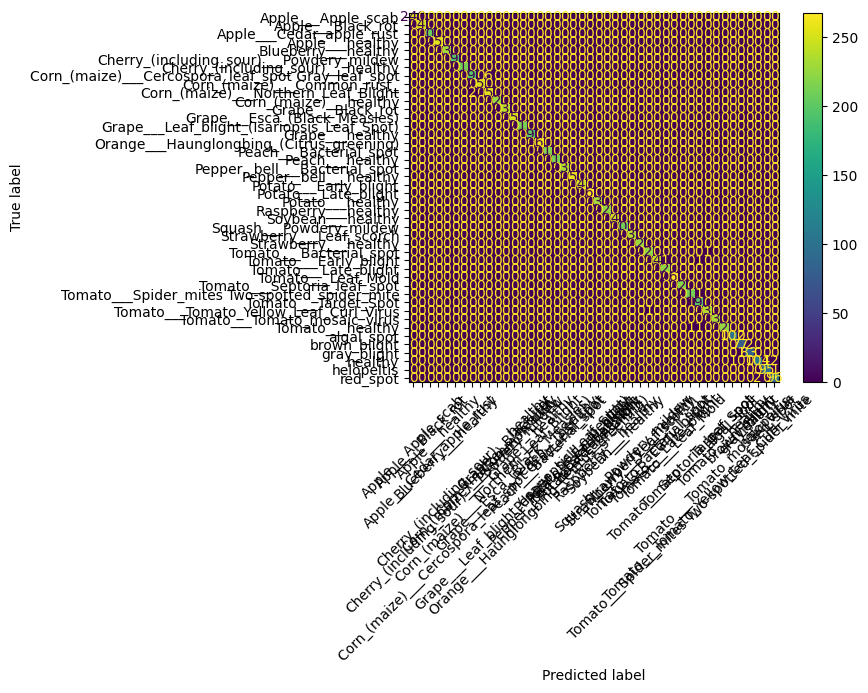

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)

labels = train_ds.features['label'].names
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=45)

In [ ]:
trainer.push_to_hub()

CommitInfo(commit_url='https://huggingface.co/Abhiram4/PlantDiseaseDetectorSwinv2/commit/57632298d00d9286ae87e90bbabce495a5243a1d', commit_message='End of training', commit_description='', oid='57632298d00d9286ae87e90bbabce495a5243a1d', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=labels, digits=4)
print(report)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab     1.0000    1.0000    1.0000       249
                                 Apple___Black_rot     1.0000    1.0000    1.0000       248
                          Apple___Cedar_apple_rust     1.0000    1.0000    1.0000       206
                                   Apple___healthy     1.0000    1.0000    1.0000       255
                               Blueberry___healthy     1.0000    1.0000    1.0000       231
          Cherry_(including_sour)___Powdery_mildew     1.0000    1.0000    1.0000       196
                 Cherry_(including_sour)___healthy     1.0000    1.0000    1.0000       213
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot     0.9899    0.9703    0.9800       202
                       Corn_(maize)___Common_rust_     1.0000    1.0000    1.0000       251
               Corn_(maize)___Northern_Leaf_Blight     0.9770    0.9922    0.98